In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import learning_curve
#---------------------(Read Dataset)-------------------------------------------
df=pd.read_csv("C:/Users/Asus/Desktop/Forecasting-covidcases/dataset-fr.csv")
df['date']=pd.to_datetime(df['date']).dt.date
df.set_index('date',inplace=True)
#------------------(Split Dataset)---------------------------------------------
TRAIN_SPLIT=int(len(df)*0.8)
#print(TRAIN_SPLIT)
lag=21 #for active cases (conf_j1)

In [3]:
#------------------(convert to supervised)-------------------------------------
#------------------(Multivariate_data function)--------------------------------
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])

    return np.array(data), np.array(labels)
#------------------------(set variable and convert to supervised)--------------
#the function just accept the array type
df=np.array(df)

In [4]:
#----------------------------(Scale Data)--------------------------------------
scaler =MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(df)
past_history =lag
#number of step for prediction
future_target = 1
STEP = 1
#train_size_lc=[1,35,45,55,65,75,85,95,105,115,130]

tscv = TimeSeriesSplit(n_splits = 3 )

x_train_multi, y_train_multi= multivariate_data(df, df[:,12], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=False)
x_test_multi, y_test_multi = multivariate_data(df, df[:,12],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=False)




x_train_2d=x_train_multi.reshape(x_train_multi.shape[0],(x_train_multi.shape[1]*x_train_multi.shape[2]))
x_test_2d=x_test_multi.reshape(x_test_multi.shape[0],-1)                                
y_train_1d=y_train_multi.ravel()
y_test_1d=y_test_multi.ravel()
print(x_train_2d.shape)

(515, 315)


Mean training scores

 13     2.792598e-33
42     9.806766e-33
72     1.463857e-32
101    2.852367e-32
131    1.222938e-31
dtype: float64

 --------------------

Mean validation scores

 13     0.001925
42     0.001867
72     0.003568
101    0.014746
131    0.907541
dtype: float64


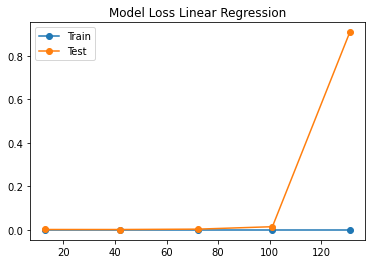

Mean training scores

 13     0.000065
42     0.000063
72     0.000072
101    0.000076
131    0.000076
dtype: float64

 --------------------

Mean validation scores

 13     0.002057
42     0.000826
72     0.000772
101    0.000772
131    0.000772
dtype: float64


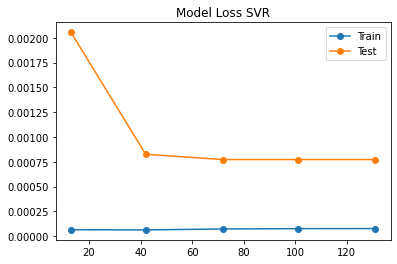

Mean training scores

 13     0.000294
42     0.000032
72     0.000025
101    0.000017
131    0.000016
dtype: float64

 --------------------

Mean validation scores

 13     0.001389
42     0.000693
72     0.000664
101    0.000675
131    0.000585
dtype: float64


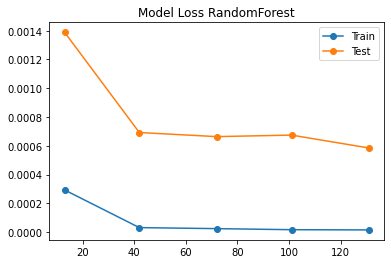

In [5]:
#---------------------(LR)-----------------------------------------------------

train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(),
X = x_train_2d,
y = y_train_1d, cv=tscv,
scoring = 'neg_mean_squared_error',shuffle=False)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.plot(train_sizes, train_scores_mean, '-o', label='Train')
plt.plot(train_sizes, validation_scores_mean, '-o', label='Test')
plt.legend()
plt.title('Model Loss Linear Regression')
plt.show() 

#--------------------------------(svr)-----------------------------------------

train_sizes, train_scores, validation_scores = learning_curve(
estimator =  SVR(C=1, epsilon=0.01, gamma=0.01, kernel='poly'),
X = x_train_2d,
y = y_train_1d, cv=tscv ,
scoring = 'neg_mean_squared_error',shuffle=False)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.plot(train_sizes, train_scores_mean, '-o', label='Train')
plt.plot(train_sizes, validation_scores_mean, '-o', label='Test')
plt.legend()
plt.title('Model Loss SVR')
plt.show() 


#-------------------------------(Random Forest)--------------------------------

train_sizes, train_scores, validation_scores = learning_curve(
estimator =  RandomForestRegressor(max_depth=80, min_samples_leaf=4, min_samples_split=10,
                      n_estimators=200),
X = x_train_2d,
y = y_train_1d, cv=tscv ,
scoring = 'neg_mean_squared_error',shuffle=False)
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
plt.plot(train_sizes, train_scores_mean, '-o', label='Train')
plt.plot(train_sizes, validation_scores_mean, '-o', label='Test')
plt.legend()
plt.title('Model Loss RandomForest')
plt.show() 